#**Introduction to Salmon**

In the previous Module, you were introduced to R code for running DESeq2 given unnormalized read counts in matrix form. Today, we will instead introduce a way to import count data from the popular quasi-mapping software Salmon. Compared to methods which map reads to a reference genome or transcriptome, Salmon and similar methods are much faster as they avoid the need for base-by-base alignment.

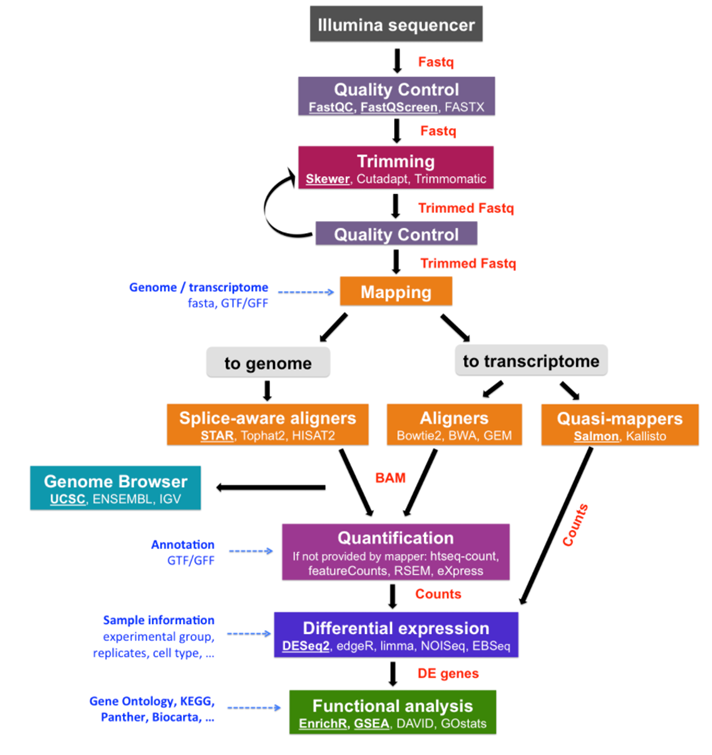

The output count format of Salmon are `quant.sf` files which have the following format. Here, the IDs under "Name" are Ensembl Transcript IDs.

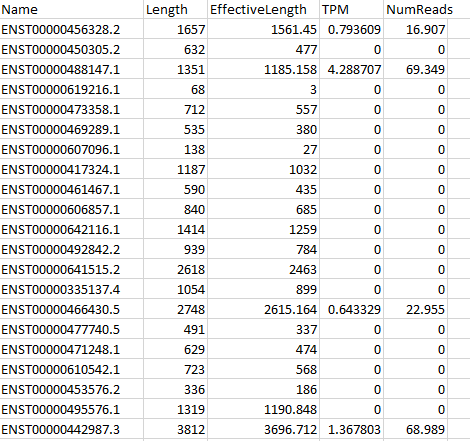

To import data of with this format, it is best practice to use the `tximport` or `tximeta` packages to convert the transcript-level abundances output by Salmon into count matrices for use with DESeq2. 

For more information about `tximport`, see here: 
`https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4712774/`



#**Lab 9 Assignment: Importing data into DESeq2**

In a copy of this Colab notebook, use what you have learned about Python, R, and Git in the previous lab assignments to fill in the missing portions of the code below. Text that is missing is represented with black squares, ◼.  You will be graded based whether you can produce the volcano, PCA, and heatmaps. 

In [ ]:
%load_ext rpy2.ipython

###**Download and install the Bioconductor package manager package.**

In [ ]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager", quiet = TRUE)

###**Download and install the `tximeta` package from Bioconductor.**

This step will take around ten to fifteen minutes to complete.

In [ ]:
%%R
BiocManager::install("tximeta", quiet = TRUE, ask = FALSE)
◼◼◼◼(tximeta)

R[write to console]: 'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


R[write to console]: Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

R[write to console]: Installing package(s) 'tximeta'

R[write to console]: also installing the dependencies ‘sass’, ‘rjson’, ‘httpuv’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘bslib’, ‘htmlwidgets’, ‘crosstalk’, ‘GenomicAlignments’, ‘restfulr’, ‘lazyeval’, ‘Rhtslib’, ‘shiny’, ‘DT’, ‘BiocIO’, ‘rtracklayer’, ‘biomaRt’, ‘AnnotationFilter’, ‘Rsamtools’, ‘ProtGenerics’, ‘filelock’, ‘interactiveDisplayBase’, ‘tximport’, ‘GenomicFeatures’, ‘ensembldb’, ‘BiocFileCache’, ‘AnnotationHub’




###**Download and install the DESeq2 package from Bioconductor.**

This step will take around ten to fifteen minutes to complete.

In [ ]:
%%R
BiocManager::install("DESeq2", quiet = TRUE, ask = FALSE)
◼◼◼◼(DESeq2)

R[write to console]: 'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


R[write to console]: Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

R[write to console]: Installing package(s) 'BiocVersion', 'DESeq2'

R[write to console]: also installing the dependencies ‘bitops’, ‘formatR’, ‘plogr’, ‘png’, ‘Biostrings’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘matrixStats’, ‘lambda.r’, ‘futile.options’, ‘RSQLite’, ‘KEGGREST’, ‘XML’, ‘xtable’, ‘GenomeInfoDb’, ‘XVector’, ‘MatrixGenerics’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘AnnotationDbi’, ‘annotate’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘genefilter’, ‘locfit’, ‘geneplotter’, ‘RcppArmadillo’


R[write to console]: Old packages: 'broom', 'cli', 'dtplyr', 'fansi', 'gert', 'glue', 'jsonlite',
  'pillar', 'Rcpp', 'testthat', 'yaml', 'c

###**Clone the GitHub repository at https://github.com/mikelove/airway2 .**

In [ ]:
%%bash
git clone ◼◼◼◼◼◼

Cloning into 'airway2'...


###**Use Pandas to view one of the `quant.sf` files within the repository.**

Note that you can use any of the data wrangling or data manipulation commands you've learned in the past for tabular datasets.

In [ ]:
import pandas as pd
df = pd.read_csv("◼◼◼◼◼", sep = '◼◼').head()

,Name,Length,EffectiveLength,TPM,NumReads
0,ENST00000456328.2,1657,1561.450,0.793609,16.907
1,ENST00000450305.2,632,477.000,0.000000,0.000
2,ENST00000488147.1,1351,1185.158,4.288707,69.349
3,ENST00000619216.1,68,3.000,0.000000,0.000
4,ENST00000473358.1,712,557.000,0.000000,0.000


###**Use Pandas to obtain summary statistics for one of the `quant.sf` files within the repository.**

In [ ]:
df.◼◼◼◼()

,Length,EffectiveLength,TPM,NumReads
count,205870.000000,205870.000000,205870.000000,205870.000000
mean,1534.622276,1365.737477,4.857434,93.741603
std,1897.253607,1874.180936,111.414223,1389.751049
min,8.000000,1.000000,0.000000,0.000000
25%,555.000000,396.000000,0.000000,0.000000
50%,814.000000,654.072000,0.000000,0.000000
75%,1961.000000,1786.000000,0.548595,5.821750
max,205012.000000,196785.096000,22935.195816,249352.263000


##**Save the `SraRunTable.txt` file in an R variable called `metadata`.**

In [ ]:
%%R
metadata <- read.csv("◼◼◼◼◼", header = TRUE, sep = "◼◼", row.names=NULL)
head(metadata)

  AvgSpotLen    BioSample Experiment MBases MBytes        Run SRA_Sample
1        126 SAMN02422669  SRX384345   2756   1588 SRR1039508  SRS508568
2        126 SAMN02422675  SRX384346   2542   1480 SRR1039509  SRS508567
3        126 SAMN02422678  SRX384349   3380   2055 SRR1039512  SRS508571
4         87 SAMN02422670  SRX384350   3615   2271 SRR1039513  SRS508572
5        120 SAMN02422682  SRX384353   3445   2147 SRR1039516  SRS508575
6        126 SAMN02422673  SRX384354   4121   2654 SRR1039517  SRS508576
  Sample_Name cell_line ercc_mix     treatment Assay_Type  BioProject
1  GSM1275862    N61311        -     Untreated    RNA-Seq PRJNA229998
2  GSM1275863    N61311        - Dexamethasone    RNA-Seq PRJNA229998
3  GSM1275866   N052611        -     Untreated    RNA-Seq PRJNA229998
4  GSM1275867   N052611        1 Dexamethasone    RNA-Seq PRJNA229998
5  GSM1275870   N080611        -     Untreated    RNA-Seq PRJNA229998
6  GSM1275871   N080611        - Dexamethasone    RNA-Seq PRJNA229998

###**Save the absolute path of every `quant.sf` file in a variable called `files`.**

In [ ]:
%%R
files <- paste("/content/airway2/inst/extdata/quants/", metadata$◼◼◼, "/quant.sf", sep="")
files

[1] "/content/airway2/inst/extdata/quants/SRR1039508/quant.sf"
[2] "/content/airway2/inst/extdata/quants/SRR1039509/quant.sf"
[3] "/content/airway2/inst/extdata/quants/SRR1039512/quant.sf"
[4] "/content/airway2/inst/extdata/quants/SRR1039513/quant.sf"
[5] "/content/airway2/inst/extdata/quants/SRR1039516/quant.sf"
[6] "/content/airway2/inst/extdata/quants/SRR1039517/quant.sf"
[7] "/content/airway2/inst/extdata/quants/SRR1039520/quant.sf"
[8] "/content/airway2/inst/extdata/quants/SRR1039521/quant.sf"


###**Create an R data.frame containing the above absolute paths, SRA Run IDs, and treatment status.**

In [ ]:
%%R
coldata <- data.frame(files, names=metadata$◼◼◼, condition=metadata$◼◼◼◼, stringsAsFactors=FALSE)
coldata

                                                     files      names
1 /content/airway2/inst/extdata/quants/SRR1039508/quant.sf SRR1039508
2 /content/airway2/inst/extdata/quants/SRR1039509/quant.sf SRR1039509
3 /content/airway2/inst/extdata/quants/SRR1039512/quant.sf SRR1039512
4 /content/airway2/inst/extdata/quants/SRR1039513/quant.sf SRR1039513
5 /content/airway2/inst/extdata/quants/SRR1039516/quant.sf SRR1039516
6 /content/airway2/inst/extdata/quants/SRR1039517/quant.sf SRR1039517
7 /content/airway2/inst/extdata/quants/SRR1039520/quant.sf SRR1039520
8 /content/airway2/inst/extdata/quants/SRR1039521/quant.sf SRR1039521
      condition
1     Untreated
2 Dexamethasone
3     Untreated
4 Dexamethasone
5     Untreated
6 Dexamethasone
7     Untreated
8 Dexamethasone


###**Use `tximeta`'s core function to convert transcript-level abundances to count matrices and download additional metadata for the `quant.sf` files.**

In [ ]:
%%R
summarizedExperiment <- tximeta(coldata, type="◼◼◼◼", txOut=TRUE)

R[write to console]: importing quantifications

R[write to console]: reading in files with read_tsv

R[write to console]: 1 
R[write to console]: 2 
R[write to console]: 3 
R[write to console]: 4 
R[write to console]: 5 
R[write to console]: 6 
R[write to console]: 7 
R[write to console]: 8 
R[write to console]: 




tximeta needs a BiocFileCache directory to access and save TxDb objects.
Do you wish to use the default directory: '/root/.cache/R/BiocFileCache'?
If not, a temporary directory that is specific to this R session will be used.

You can always change this directory later by running: setTximetaBFC()
Or enter [0] to exit and set this directory manually now.
This location can also be set by environmental variable TXIMETA_HUB_CACHE. 

1: Yes (use default)
2: No (use temp)

Selection: No
Enter an item from the menu, or 0 to exit
Selection: Yes
Enter an item from the menu, or 0 to exit
Selection: Yes
Enter an item from the menu, or 0 to exit
Selection: 1
/root/.cache/R/BiocFileCache
  does not exist, create directory? (yes/no): yes


R[write to console]: found matching transcriptome:
[ GENCODE - Homo sapiens - release 29 ]

R[write to console]: useHub=TRUE: checking for TxDb via 'AnnotationHub'

R[write to console]: using temporary cache /tmp/RtmprpDJ13/BiocFileCache

  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |                                                                      |   1%
  |                                                                            
  |=                                                                     |   1%
  |                                                                            
  |=                                                                     |   2%
  |                                                                            
  |==                                    

R[write to console]: snapshotDate(): 2021-10-20

R[write to console]: found matching TxDb via 'AnnotationHub'

R[write to console]: downloading 1 resources

R[write to console]: retrieving 1 resource

  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |                                                                      |   1%
  |                                                                            
  |=                                                                     |   1%
  |                                                                            
  |=                                                                     |   2%
  |                                                                            
  |==                                                                    |   2%

R[write to console]: loading from cache

R[write to console]: Loading required package: GenomicFeatures

R[write to console]: Loading required package: AnnotationDbi

R[write to console]: generating transcript ranges



The variable summarizedExperiment contains a special `SummarizedExperiment` data structure compatible with DESeq2. 

For more information about the `SummarizedExperiment` container, see this reference: https://bioconductor.org/packages/release/workflows/vignettes/rnaseqGene/inst/doc/rnaseqGene.html#summarizedexperiment

###**Call the name `summarizedExperiment` to see what information it contains.**

In [ ]:
%%R
summarizedExperiment

class: RangedSummarizedExperiment 
dim: 205870 8 
metadata(6): tximetaInfo quantInfo ... txomeInfo txdbInfo
assays(23): counts abundance ... infRep19 infRep20
rownames(205870): ENST00000456328.2 ENST00000450305.2 ...
  ENST00000387460.2 ENST00000387461.2
rowData names(3): tx_id gene_id tx_name
colnames(8): SRR1039508 SRR1039509 ... SRR1039520 SRR1039521
colData names(2): names condition


###**Import `summarizedExperiment` into DESeq2 with the DESeqDataSet() function.**

In [ ]:
%%R
dds <- DESeqDataSet(summarizedExperiment, design = ~ ◼◼◼◼◼)

R[write to console]: using counts and average transcript lengths from tximeta



###**Run DESeq2's core function on the DESeqDataSet named `dds`.**

In [ ]:
%%R
dds <- DESeq(◼◼◼)

R[write to console]: estimating size factors

R[write to console]: using 'avgTxLength' from assays(dds), correcting for library size

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: -- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



###**Use the `results()` function to extract a results table from the DESeqDataSet.**

In [ ]:
%%R
resultsTable <- results(◼◼◼◼, tidy=TRUE)
head(resultsTable)

                row   baseMean log2FoldChange     lfcSE      stat    pvalue
1 ENST00000456328.2  7.4684310      1.1298235 2.1095975 0.5355636 0.5922602
2 ENST00000450305.2  0.0000000             NA        NA        NA        NA
3 ENST00000488147.1 84.4328609      0.3692113 0.3662141 1.0081842 0.3133660
4 ENST00000619216.1  0.0000000             NA        NA        NA        NA
5 ENST00000473358.1  0.0000000             NA        NA        NA        NA
6 ENST00000469289.1  0.1354145      0.5487253 3.5338115 0.1552786 0.8766017
       padj
1 0.9916537
2        NA
3 0.8778774
4        NA
5        NA
6        NA


###**Download and install the `EnhancedVolcano` package.**

In [ ]:
%%R
devtools::install_github('kevinblighe/EnhancedVolcano', quiet = TRUE)
library(EnhancedVolcano)

R[write to console]: Installing 1 packages: ggrepel

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: ggrepel



###**Use `EnhancedVolcano`'s core functiion to make a volcano plot**

In [ ]:
%%R
pdf("volcanoPlot.pdf", width = 9, height = 9)
EnhancedVolcano(◼◼◼◼, x = 'log2FoldChange', y = 'pvalue', pCutoff = 10e-6, FCcutoff = 1,  pointSize = 1, title = 'Treatment vs. Control', lab = resultsTable$◼◼◼, labSize = 3.0,  parseLabels = TRUE, drawConnectors = TRUE, widthConnectors = 0.2)

###**Use the `vst()` function to convert the DESeqDataSet into a DESeqTransform data structure.**

In [ ]:
%%R
dst <- vst(◼◼◼◼, blind=FALSE)
head(assay(dst))

                  SRR1039508 SRR1039509 SRR1039512 SRR1039513 SRR1039516
ENST00000456328.2   8.308406   8.331131   8.198955   7.932729   8.300794
ENST00000450305.2   7.932729   7.932729   7.932729   7.932729   7.932729
ENST00000488147.1   8.682558   8.776027   9.093835   8.711117   8.762842
ENST00000619216.1   7.932729   7.932729   7.932729   7.932729   7.932729
ENST00000473358.1   7.932729   7.932729   7.932729   7.932729   7.932729
ENST00000469289.1   7.932729   7.932729   7.932729   7.932729   7.932729
                  SRR1039517 SRR1039520 SRR1039521
ENST00000456328.2   7.932729   7.932729   7.932729
ENST00000450305.2   7.932729   7.932729   7.932729
ENST00000488147.1   8.676732   8.654567   8.696901
ENST00000619216.1   7.932729   7.932729   7.932729
ENST00000473358.1   7.932729   7.932729   7.932729
ENST00000469289.1   7.932729   8.028774   7.932729


###**Use the `plotPCA` function to make a PCA plot.**

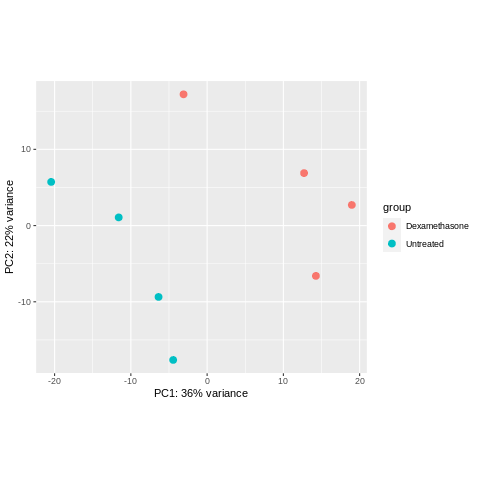

In [ ]:
%%R
#pdf("PCA.pdf", width = 7, height = 5)
plotPCA(dst, intgroup="◼◼◼◼◼")

###**Install the packages below.**

In [ ]:
%%R 
install.packages("genefilter",  quiet = TRUE)
library( "genefilter" )

install.packages('gplots',  quiet = TRUE)
library( "gplots" )

install.packages('RColorBrewer',  quiet = TRUE)
library( "RColorBrewer" )

R[write to console]: 
Attaching package: 'genefilter'


R[write to console]: The following objects are masked from 'package:MatrixGenerics':

    rowSds, rowVars


R[write to console]: The following objects are masked from 'package:matrixStats':

    rowSds, rowVars




###**Select the a certain number of genes with the highest variance between samples.** 

In [ ]:
%%R
topVarGenes <- head( order( rowVars( assay(dst) ), decreasing=TRUE ), 25 )

###**Use the `heatmap.2()` function to plot an expression-level heatmap with hierarchical clustering of the samples.**

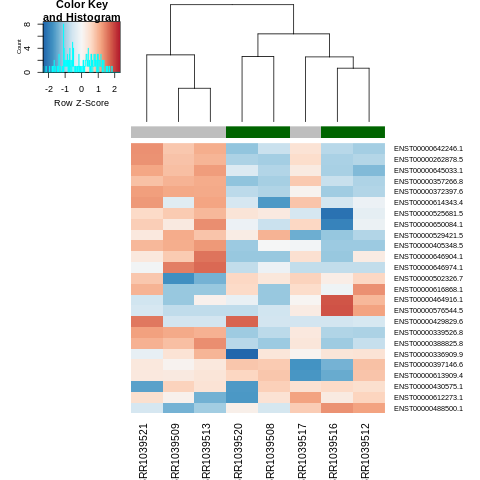

In [ ]:
%%R
#pdf("heatmap.pdf", width = 7, height = 6)
heatmap.2( assay(dst)[ topVarGenes, ], scale="row", 
     trace="none", dendrogram="column", margins = c(7, 10),
     col = colorRampPalette( rev(brewer.pal(9, "RdBu")) )(255),
     ColSideColors = c( Control="gray", DPN="darkgreen", OHT="orange" )
     [ colData(dst)$◼◼◼◼◼ ], )

#**Optional Challenge**

Write R code and use the `biomaRt` R package to convert the Ensembl transcript IDs into gene names. Then, remake the volcano plot with the gene names as labels instead of the transcript IDs.